In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/CSV files/axis_hour_data.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mean_data = df.loc[:, ['open', 'close']].mean(axis=1)
df['mean_data']=mean_data
# dataset=df[['date','mean_data']]
dataset=df[['mean_data']]
dataset = pd.DataFrame({'mean_data': mean_data, 'lag_1': mean_data.shift(1),
                        'lag_2': mean_data.shift(2), 'lag_3': mean_data.shift(3),
                        'lag_4': mean_data.shift(4), 'lag_5': mean_data.shift(5)})
dataset = dataset.dropna()
dataset.tail()

,mean_data,lag_1,lag_2,lag_3,lag_4,lag_5
16197,1239.425,1238.100,1234.825,1234.175,1232.275,1226.625
16198,1239.500,1239.425,1238.100,1234.825,1234.175,1232.275
16199,1239.500,1239.500,1239.425,1238.100,1234.825,1234.175
16200,1239.500,1239.500,1239.500,1239.425,1238.100,1234.825
16201,1239.500,1239.500,1239.500,1239.500,1239.425,1238.100


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
train=dataset.iloc[:-7]
test=dataset.iloc[-7:]

In [ ]:
# Define exogenous variables for training
x_train=train[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train['mean_data']
y_test=test['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Make predictions on the test set


# Forecasting future values
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
forecast_values=forecast_mean.tolist()
y_test_values=y_test.tolist()
print(forecast_values)
print(y_test_values)
df=pd.DataFrame({'Iteration':1,'Actual_values': y_test_values, 'Predictions': forecast_values})
df['Iteration'] = ['1'] + [''] * (len(df) - 1)

df

[1234.189208410969, 1235.085077873293, 1239.241424375818, 1239.5920159095383, 1239.5594331202265, 1239.5731670261284, 1239.5483607779593]
[1234.825, 1238.1, 1239.425, 1239.5, 1239.5, 1239.5, 1239.5]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
5,,1239.500,1239.573167
6,,1239.500,1239.548361


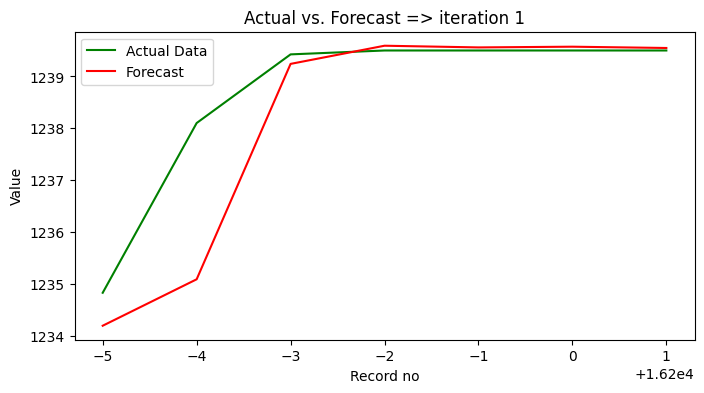

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 1')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

**2**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

new data frame 
Mean Absolute Error (MAE): 2.8299878377368777
Mean Squared Error (MSE): 19.938893615112647
Root Mean Squared Error (RMSE): 4.46529882707895


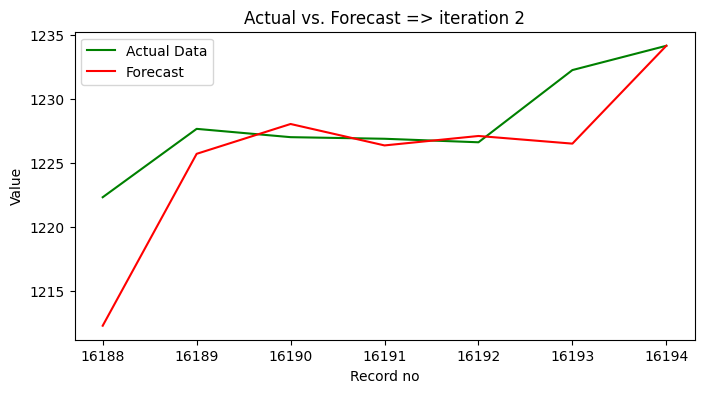

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
train2=dataset.iloc[:-14]
test2=dataset.iloc[-14:-7]

# Define exogenous variables for training
x_train=train2[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test2[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train2['mean_data']
y_test=test2['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean

print('new data frame ')
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 2')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()


In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
5,,1239.500,1239.573167
6,,1239.500,1239.548361
7,NaN,1222.325,1212.272550
8,NaN,1227.675,1225.721861
9,NaN,1227.025,1228.055506


**3**

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Percentage Error (MAPE): 0.23079282363908904%


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


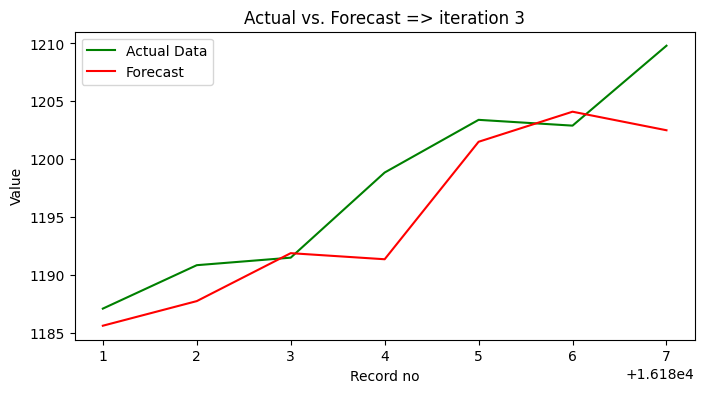

Mean Absolute Percentage Error (MAPE): 0.27180540934771646%


In [ ]:
train3=dataset.iloc[:-21]
test3=dataset.iloc[-21:-14]

# Define exogenous variables for training
x_train=train3[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test3[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train3['mean_data']
y_test=test3['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
# print('-'*10)
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 3')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
5,,1239.500,1239.573167
6,,1239.500,1239.548361
7,NaN,1222.325,1212.272550
8,NaN,1227.675,1225.721861
9,NaN,1227.025,1228.055506


**4**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


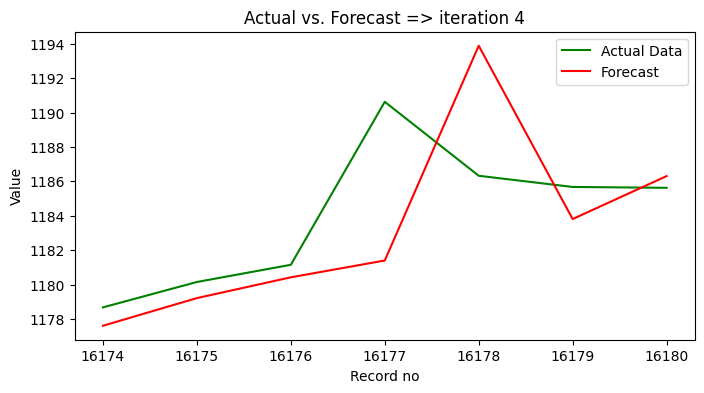

Mean Absolute Error (MAE): 3.1521812050858506
Mean Squared Error (MSE): 21.25321152067014
Root Mean Squared Error (RMSE): 4.610120553810946
Mean Absolute Percentage Error (MAPE): 0.2655065480593727%


In [ ]:
train4=dataset.iloc[:-28]
test4=dataset.iloc[-28:-21]

# Define exogenous variables for training
x_train=train4[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test4[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train4['mean_data']
y_test=test4['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
# print('-'*10)
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 4')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()
# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
5,,1239.500,1239.573167
6,,1239.500,1239.548361
7,NaN,1222.325,1212.272550
8,NaN,1227.675,1225.721861
9,NaN,1227.025,1228.055506


**5**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

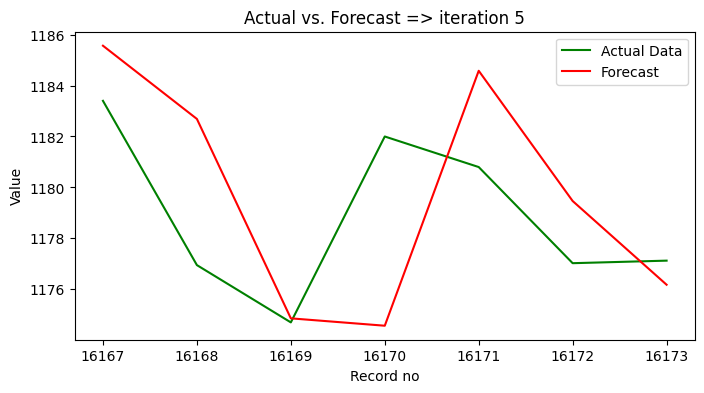

Mean Absolute Error (MAE): 3.2372414204169866
Mean Squared Error (MSE): 16.286770275451484
Root Mean Squared Error (RMSE): 4.0356870883966565
Mean Absolute Percentage Error (MAPE): 0.2743754092915326%


In [ ]:
train5=dataset.iloc[:-35]
test5=dataset.iloc[-35:-28]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 5')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
5,,1239.500,1239.573167
6,,1239.500,1239.548361
7,NaN,1222.325,1212.272550
8,NaN,1227.675,1225.721861
9,NaN,1227.025,1228.055506


**6**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


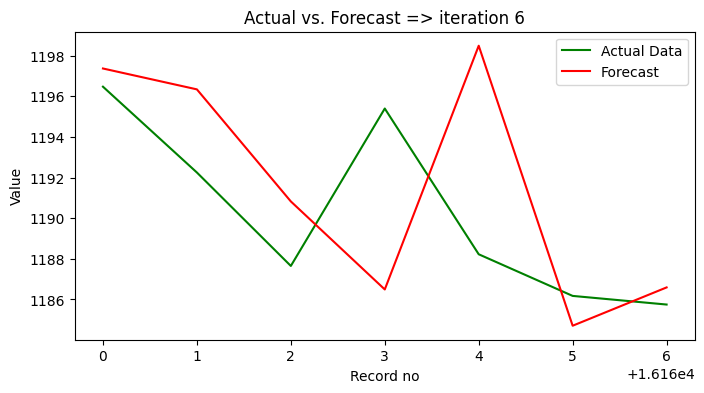

Mean Absolute Error (MAE): 4.235836207717739
Mean Squared Error (MSE): 30.752714566096973
Root Mean Squared Error (RMSE): 5.545513011985182
Mean Absolute Percentage Error (MAPE): 0.35567128149449356%


In [ ]:
train5=dataset.iloc[:-42]
test5=dataset.iloc[-42:-35]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 6')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
5,,1239.500,1239.573167
6,,1239.500,1239.548361
7,NaN,1222.325,1212.272550
8,NaN,1227.675,1225.721861
9,NaN,1227.025,1228.055506


**7**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

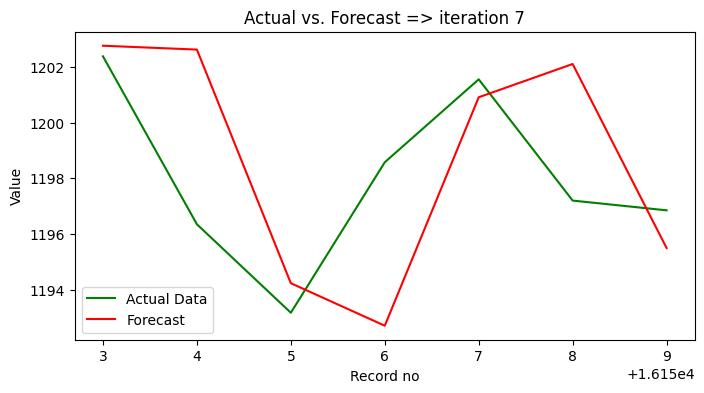

Mean Absolute Error (MAE): 2.92449209166086
Mean Squared Error (MSE): 14.458844898509861
Root Mean Squared Error (RMSE): 3.8024787834398053
Mean Absolute Percentage Error (MAPE): 0.24425054278100317%


In [ ]:
train5=dataset.iloc[:-49]
test5=dataset.iloc[-49:-42]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 7')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
5,,1239.500,1239.573167
6,,1239.500,1239.548361
7,NaN,1222.325,1212.272550
8,NaN,1227.675,1225.721861
9,NaN,1227.025,1228.055506


**8**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

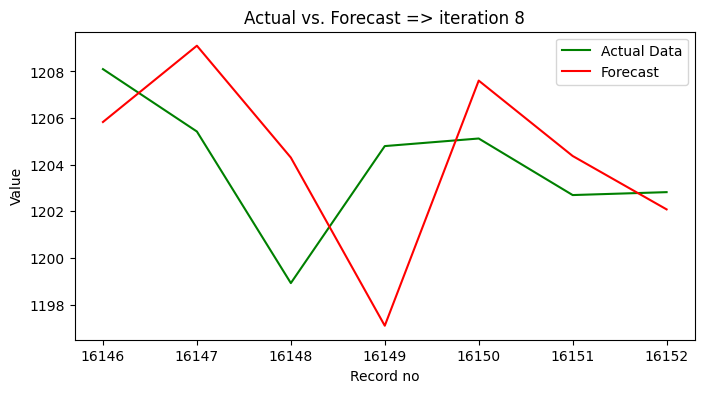

Mean Absolute Error (MAE): 3.4182551661382212
Mean Squared Error (MSE): 16.641007204556892
Root Mean Squared Error (RMSE): 4.079339064671738
Mean Absolute Percentage Error (MAPE): 0.28397751149443845%


In [ ]:
train5=dataset.iloc[:-56]
test5=dataset.iloc[-56:-49]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 8')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
5,,1239.500,1239.573167
6,,1239.500,1239.548361
7,NaN,1222.325,1212.272550
8,NaN,1227.675,1225.721861
9,NaN,1227.025,1228.055506


**9**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

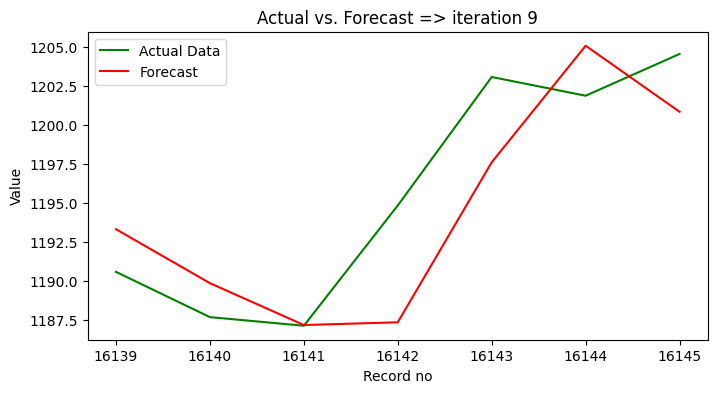

Mean Absolute Error (MAE): 3.5427976685964495
Mean Squared Error (MSE): 17.42343657390011
Root Mean Squared Error (RMSE): 4.174139021870272
Mean Absolute Percentage Error (MAPE): 0.29576120283754637%


In [ ]:
train5=dataset.iloc[:-63]
test5=dataset.iloc[-63:-56]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 9')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
58,NaN,1187.125,1187.169467
59,NaN,1194.825,1187.344274
60,NaN,1203.050,1197.588157
61,NaN,1201.850,1205.051873


**10**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

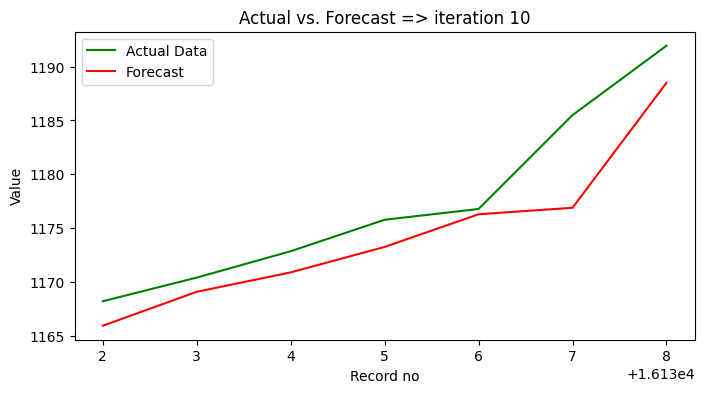

Mean Absolute Error (MAE): 2.948069683401075
Mean Squared Error (MSE): 14.775911158444798
Root Mean Squared Error (RMSE): 3.8439447392548187
Mean Absolute Percentage Error (MAPE): 0.24961503448179898%


In [ ]:
train5=dataset.iloc[:-70]
test5=dataset.iloc[-70:-63]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 10')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
65,NaN,1172.850,1170.884232
66,NaN,1175.775,1173.250005
67,NaN,1176.775,1176.283769
68,NaN,1185.500,1176.889236


**11**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

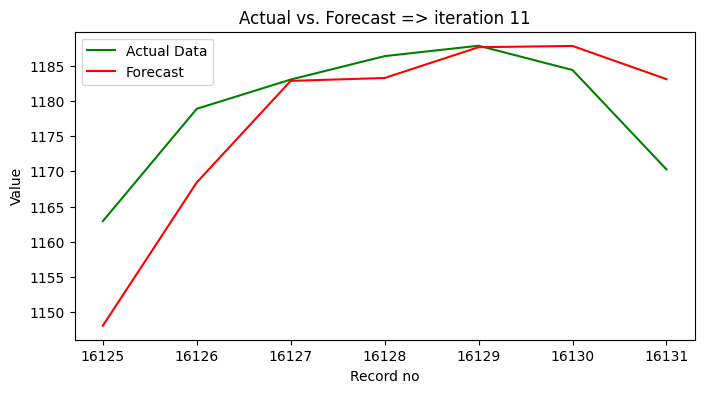

Mean Absolute Error (MAE): 6.429385096753257
Mean Squared Error (MSE): 73.51106135737517
Root Mean Squared Error (RMSE): 8.573859186934152
Mean Absolute Percentage Error (MAPE): 0.5485328459891221%


In [ ]:
train5=dataset.iloc[:-77]
test5=dataset.iloc[-77:-70]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 11')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
72,NaN,1183.025,1182.834496
73,NaN,1186.350,1183.247791
74,NaN,1187.825,1187.615631
75,NaN,1184.375,1187.790854


**12**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

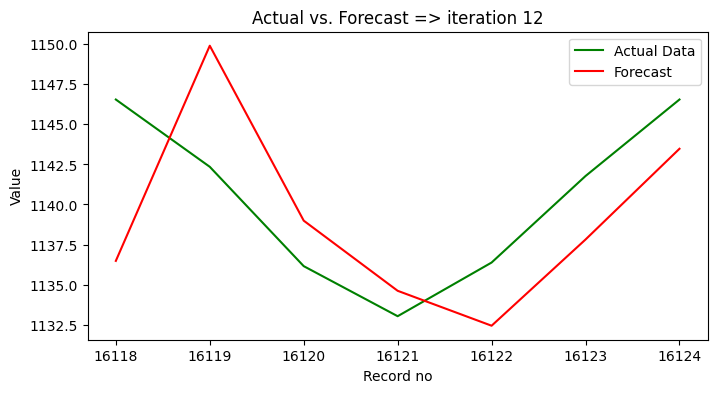

Mean Absolute Error (MAE): 4.719465975694253
Mean Squared Error (MSE): 29.979089826983095
Root Mean Squared Error (RMSE): 5.475316413412388
Mean Absolute Percentage Error (MAPE): 0.4131756633299296%


In [ ]:
train5=dataset.iloc[:-84]
test5=dataset.iloc[-84:-77]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 12')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
79,NaN,1136.150,1138.989317
80,NaN,1133.025,1134.611120
81,NaN,1136.375,1132.431161
82,NaN,1141.775,1137.812080


**13**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

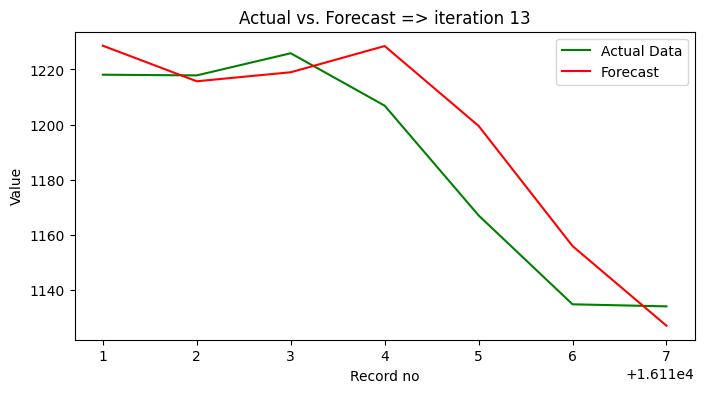

Mean Absolute Error (MAE): 14.531036598066164
Mean Squared Error (MSE): 311.0522788005011
Root Mean Squared Error (RMSE): 17.63667425566683
Mean Absolute Percentage Error (MAPE): 1.2356819012157378%


In [ ]:
train5=dataset.iloc[:-91]
test5=dataset.iloc[-91:-84]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 13')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
86,NaN,1225.850,1218.960202
87,NaN,1206.850,1228.466473
88,NaN,1167.075,1199.520827
89,NaN,1134.850,1155.963308


**14**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


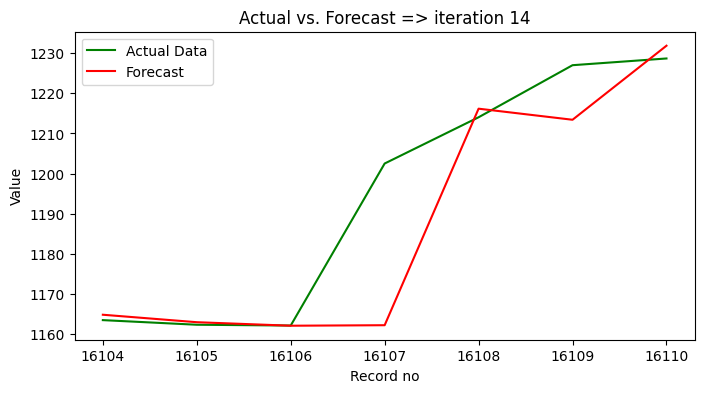

Mean Absolute Error (MAE): 8.746554656128312
Mean Squared Error (MSE): 260.73763539541125
Root Mean Squared Error (RMSE): 16.14737239910603
Mean Absolute Percentage Error (MAPE): 0.7239070443601637%


In [ ]:
train5=dataset.iloc[:-98]
test5=dataset.iloc[-98:-91]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 14')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
93,NaN,1162.125,1162.081056
94,NaN,1202.500,1162.207964
95,NaN,1214.025,1216.164655
96,NaN,1227.000,1213.404936


**15**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

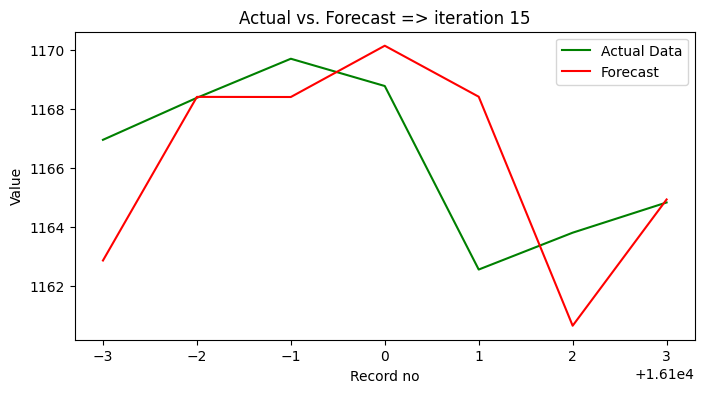

Mean Absolute Error (MAE): 2.2725194619609153
Mean Squared Error (MSE): 9.233463540792627
Root Mean Squared Error (RMSE): 3.038661471897228
Mean Absolute Percentage Error (MAPE): 0.1950545680958621%


In [ ]:
train5=dataset.iloc[:-105]
test5=dataset.iloc[-105:-98]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 15')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
100,NaN,1169.700,1168.402276
101,NaN,1168.775,1170.141635
102,NaN,1162.550,1168.411666
103,NaN,1163.800,1160.644505


**16**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


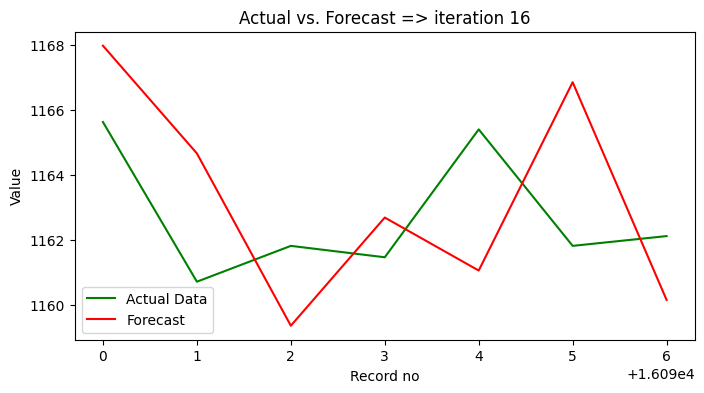

Mean Absolute Error (MAE): 3.0378586555680482
Mean Squared Error (MSE): 10.903178348068076
Root Mean Squared Error (RMSE): 3.301996115695486
Mean Absolute Percentage Error (MAPE): 0.26125986757524017%


In [ ]:
train5=dataset.iloc[:-112]
test5=dataset.iloc[-112:-105]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 16')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
107,NaN,1161.825,1159.374185
108,NaN,1161.475,1162.694472
109,NaN,1165.400,1161.067944
110,NaN,1161.825,1166.848019


**17**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


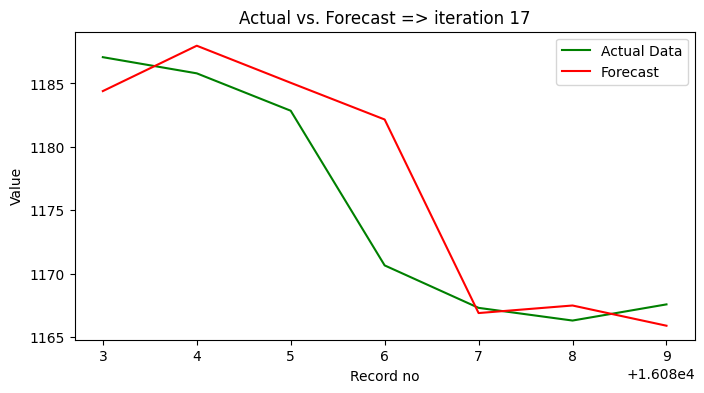

Mean Absolute Error (MAE): 3.1208775538989033
Mean Squared Error (MSE): 21.947317820488824
Root Mean Squared Error (RMSE): 4.68479645454195
Mean Absolute Percentage Error (MAPE): 0.26564730252871993%


In [ ]:
train5=dataset.iloc[:-119]
test5=dataset.iloc[-119:-112]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 17')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
114,NaN,1182.850,1185.053745
115,NaN,1170.650,1182.159278
116,NaN,1167.300,1166.890501
117,NaN,1166.300,1167.486690


**18**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

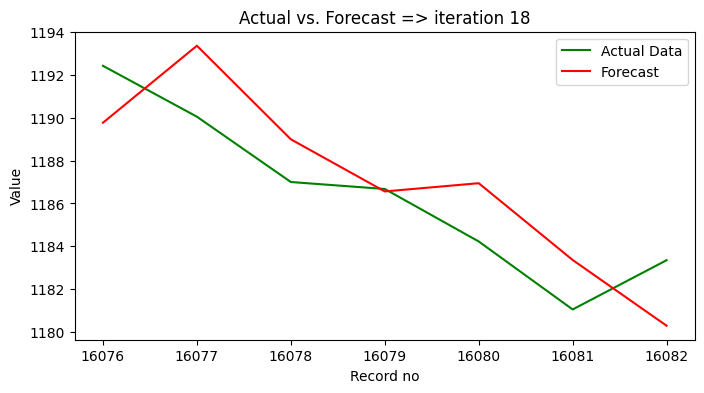

Mean Absolute Error (MAE): 2.3098983230512595
Mean Squared Error (MSE): 6.303476717847404
Root Mean Squared Error (RMSE): 2.5106725628499236
Mean Absolute Percentage Error (MAPE): 0.19468273920463558%


In [ ]:
train5=dataset.iloc[:-126]
test5=dataset.iloc[-126:-119]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 18')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
121,NaN,1187.000,1188.994896
122,NaN,1186.675,1186.560332
123,NaN,1184.225,1186.944614
124,NaN,1181.050,1183.360562


**19**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


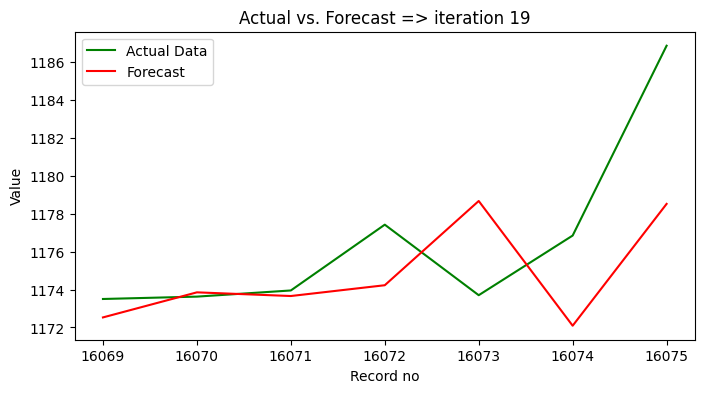

Mean Absolute Error (MAE): 3.2544587737963866
Mean Squared Error (MSE): 18.359701321893446
Root Mean Squared Error (RMSE): 4.284822204233619
Mean Absolute Percentage Error (MAPE): 0.27587652593264417%


In [ ]:
train5=dataset.iloc[:-133]
test5=dataset.iloc[-133:-126]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 19')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
128,NaN,1173.950,1173.656665
129,NaN,1177.425,1174.226355
130,NaN,1173.700,1178.675144
131,NaN,1176.850,1172.088119


**20**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next v

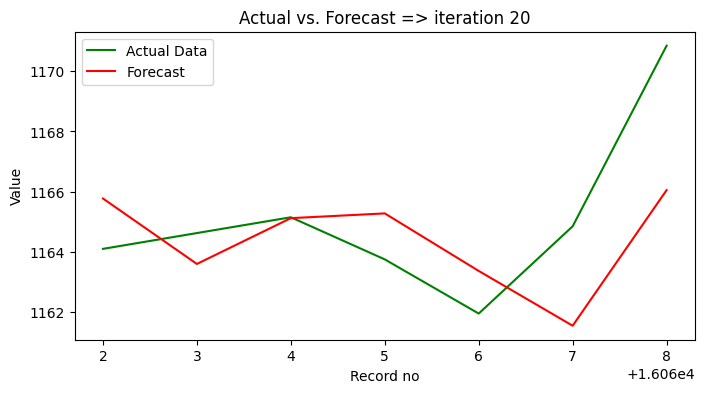

Mean Absolute Error (MAE): 1.9680574552682109
Mean Squared Error (MSE): 6.019901269332559
Root Mean Squared Error (RMSE): 2.4535487093865815
Mean Absolute Percentage Error (MAPE): 0.16872877860870464%


In [ ]:
train5=dataset.iloc[:-140]
test5=dataset.iloc[-140:-133]

# Define exogenous variables for training
x_train=train5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
x_test=test5[['lag_1','lag_2','lag_3','lag_4','lag_5']]
y_train=train5['mean_data']
y_test=test5['mean_data']

# Fit the SARIMAX model
sarimax_model = SARIMAX(y_train,
                        exog=x_train,
                        order=(1, 0, 1),
                        seasonal_order=(1, 0, 1, 5),
                        enforce_stationarity=False,
                        enforce_invertibility=False)

sarimax_result = sarimax_model.fit(disp=False)
# print(sarimax_result.summary())
forecast_steps = 7
forecast = sarimax_result.get_forecast(steps=forecast_steps, exog=x_test)
forecast_mean = forecast.predicted_mean
new_data={'Actual_values':y_test.tolist(),'Predictions':forecast_mean.tolist()}
new_rows = pd.DataFrame(new_data)
df=pd.concat([df,new_rows],ignore_index=True)

plt.figure(figsize=(8, 4))
plt.plot(y_test.index,y_test, label='Actual Data', color='green')
plt.plot(y_test.index,forecast_mean, label='Forecast', color='red')
plt.title('Actual vs. Forecast => iteration 20')
plt.xlabel('Record no')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

# Calculate error metrics
mae = mean_absolute_error(y_test, forecast_mean)
mse = mean_squared_error(y_test, forecast_mean)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, forecast_mean)

print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

In [ ]:
df

,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
135,NaN,1165.150,1165.120666
136,NaN,1163.750,1165.277991
137,NaN,1161.950,1163.366524
138,NaN,1164.850,1161.546009


In [ ]:

df.index = df.index.fillna(0)
file_name = 'SAriMax_hourly_data.xlsx'

df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')
df

DataFrame is written to Excel File successfully.


,Iteration,Actual_values,Predictions
0,1,1234.825,1234.189208
1,,1238.100,1235.085078
2,,1239.425,1239.241424
3,,1239.500,1239.592016
4,,1239.500,1239.559433
...,...,...,...
135,NaN,1165.150,1165.120666
136,NaN,1163.750,1165.277991
137,NaN,1161.950,1163.366524
138,NaN,1164.850,1161.546009
